# Carregando a base de dados

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('SMSSpamCollection.txt', delimiter = "\t")
df.columns = ["label", "message"]

# Analisando a base de dados

In [ ]:
df.shape

(5571, 2)

In [ ]:
df['label'].value_counts()

ham     4824
spam     747
Name: label, dtype: int64

In [ ]:
# Porcentagem de ham.
4824 / len(df), 
# Porcentagem de spam.
747 / len(df)

0.13408723747980614

In [ ]:
df.head()

,label,message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [ ]:
df.tail()

,label,message
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...
5570,ham,Rofl. Its true to its name


<Figure size 576x432 with 0 Axes>

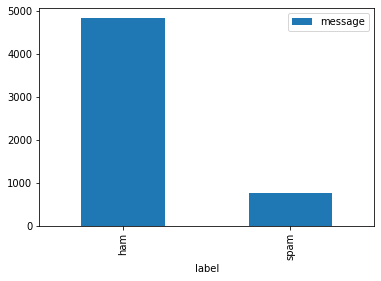

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
df.groupby('label').count().plot.bar(ylim=0)
plt.show()

# Balanceando as classes

In [ ]:
# Seleciona todas as linhas que são classificadas como ham.
df_all_ham_rows = df.loc[df['label'] == 'ham']

In [ ]:
df_all_ham_rows.shape

(4824, 2)

In [ ]:
df_all_ham_rows.head()

,label,message
0,ham,Ok lar... Joking wif u oni...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
5,ham,Even my brother is not like to speak with me. ...
6,ham,As per your request 'Melle Melle (Oru Minnamin...


In [ ]:
df_all_ham_rows.tail()

,label,message
5564,ham,Huh y lei...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...
5570,ham,Rofl. Its true to its name


# Selecionando amostras 'ham' de forma aleatória

In [ ]:
df_ham_random_sample = df_all_ham_rows.sample(n = 747, random_state = 33)
df_ham_random_sample.shape

(747, 2)

# Selecionando todas as amostras de 'spam'

In [ ]:
df_all_spam_rows = df.loc[df['label'] == 'spam']

# Criando um novo dataframe balanceado

In [ ]:
df_balanced = pd.DataFrame(columns = ['label', 'message'])
df_balanced = pd.concat([df_all_spam_rows, df_ham_random_sample])

In [ ]:
df_balanced['label'].value_counts()

spam    747
ham     747
Name: label, dtype: int64

<Figure size 576x432 with 0 Axes>

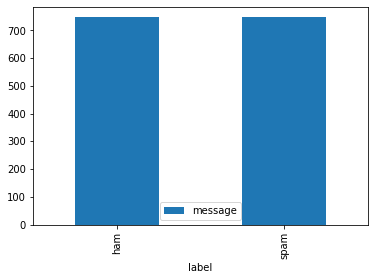

In [ ]:
plt.figure(figsize=(8,6))
df_balanced.groupby('label').count().plot.bar(ylim=0)
plt.show()

# Separando conjuntos de teste e de treino

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df_balanced, test_size = 0.30, random_state = 42)

<Figure size 576x432 with 0 Axes>

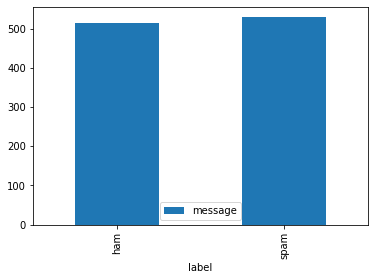

In [ ]:
plt.figure(figsize=(8,6))
train.groupby('label').count().plot.bar(ylim=0)
plt.show()

<Figure size 576x432 with 0 Axes>

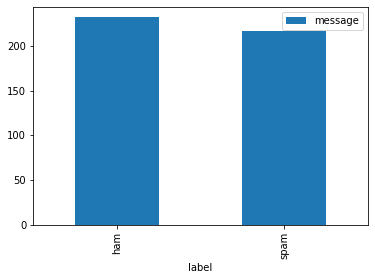

In [ ]:
plt.figure(figsize=(8,6))
test.groupby('label').count().plot.bar(ylim=0)
plt.show()

In [ ]:
test['label'].value_counts()

ham     232
spam    217
Name: label, dtype: int64

In [ ]:
X_train = train.message
X_test = test.message

In [ ]:
X_train.shape

(1045,)

In [ ]:
X_test.shape

(449,)

# Aplicando o treinamento

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None)))])

In [ ]:
NB_pipeline.fit(X_train, train['label'])

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0,
                                                             class_pri

# Verificando a acurácia

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
prediction = NB_pipeline.predict(X_test)
'Test accuracy is {}'.format(accuracy_score(test['label'], prediction))

'Test accuracy is 0.9220489977728286'